C:\Users\Ankit Dubey\AppData\Local\Temp\ipykernel_16244\2539132225.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")


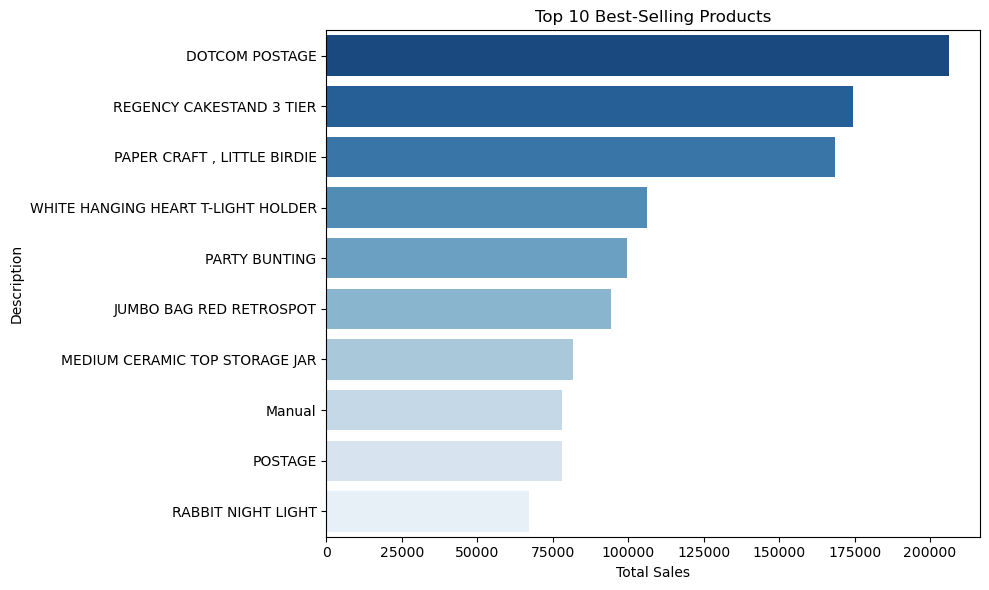

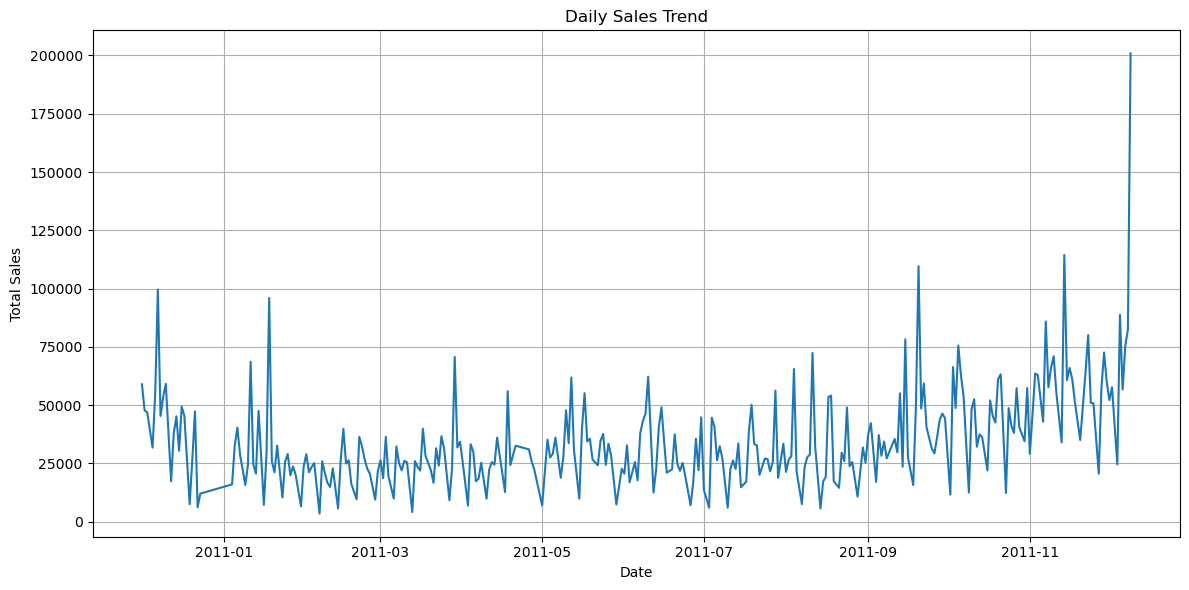

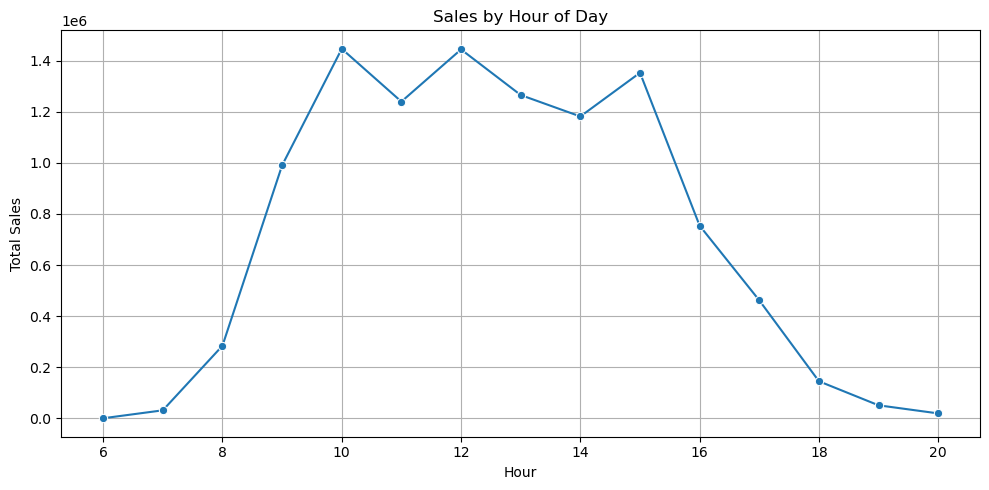

C:\Users\Ankit Dubey\AppData\Local\Temp\ipykernel_16244\2539132225.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="Purples")


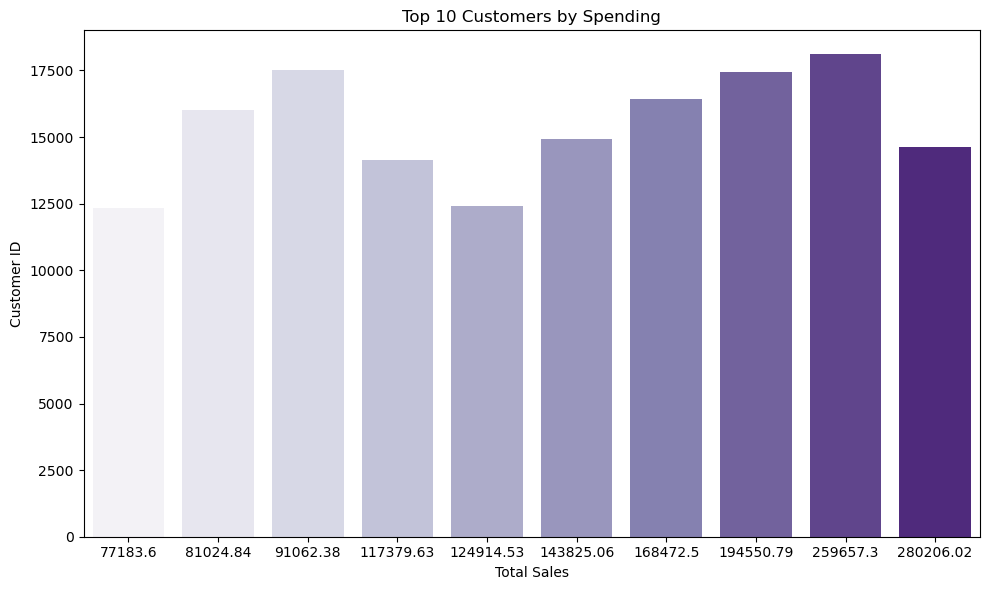

✅ Total Revenue: $ 10666684.54
📦 Total Orders: 19960
👥 Unique Customers: 4338


In [8]:
# Project 5: E-Commerce Data Insights (Based on your dataset structure)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

# Rename for easier reference (not necessary, but clearer)
product_col = 'Description'
quantity_col = 'Quantity'
price_col = 'UnitPrice'
time_col = 'InvoiceDate'
user_col = 'CustomerID'

# Convert InvoiceDate to datetime
df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=[product_col, price_col, quantity_col, time_col], inplace=True)

# Filter out non-positive values
df = df[(df[price_col] > 0) & (df[quantity_col] > 0)]

# Create TotalSales column
df["TotalSales"] = df[price_col] * df[quantity_col]

# Top-selling products
top_products = df.groupby(product_col)["TotalSales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

# Sales over time (daily)
df['DateOnly'] = df[time_col].dt.date
daily_sales = df.groupby('DateOnly')["TotalSales"].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Hourly trend
df["Hour"] = df[time_col].dt.hour
hourly_sales = df.groupby("Hour")["TotalSales"].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o")
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Top customers (if available)
if user_col in df.columns:
    top_customers = df.groupby(user_col)["TotalSales"].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_customers.values, y=top_customers.index, palette="Purples")
    plt.title("Top 10 Customers by Spending")
    plt.xlabel("Total Sales")
    plt.ylabel("Customer ID")
    plt.tight_layout()
    plt.show()

# Summary stats
print("Total Revenue: $", round(df["TotalSales"].sum(), 2))
print("Total Orders:", df["InvoiceNo"].nunique())
print("Unique Customers:", df["CustomerID"].nunique())
